In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
from scipy import stats, sparse
from scipy.special import beta as BF
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import seaborn as sns

## Load osmFISH data

31 unique cell types
11 unique region labels


/var/folders/22/7j5mzhs548x8pfphm04hw4gh0000gq/T/ipykernel_58722/1257470356.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster_remap'] = df['ClusterName'].apply(lambda x: new_celltype_id_dict[x])
/var/folders/22/7j5mzhs548x8pfphm04hw4gh0000gq/T/ipykernel_58722/1257470356.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cell_type_color'] = df['Cluster_remap'].apply(lambda x: type_color_dict[x])
/var/folders/22/7j5mzhs548x8pfphm04hw4gh0000gq/T/ipykernel_58722/1257470356.py:35: SettingWith

<Figure size 432x288 with 0 Axes>

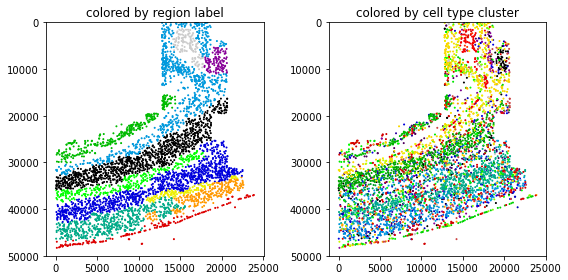

In [2]:
data = sc.read_loom('./data/osmFISH_SScortex_mouse_all_cells.loom')
df = data.obs
df = df[df['ClusterID'] != 0] #subset to the included cells.
df.reset_index(inplace=True)
cell_type_names = np.array(df['ClusterName'].unique())
n_cell_types = len(cell_type_names)
print("%s unique cell types" % n_cell_types)
new_celltype_id_dict = dict(zip(cell_type_names, [x for x in range(0, len(cell_type_names))]))
df['Cluster_remap'] = df['ClusterName'].apply(lambda x: new_celltype_id_dict[x])
cell_type_names = np.array(df['Cluster_remap'].unique())

cmap = cm.get_cmap('nipy_spectral', n_cell_types)

color_list = []
for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    #print(colors.rgb2hex(rgb))
    color_list.append(colors.rgb2hex(rgb))
type_color_dict = dict(zip(cell_type_names, color_list))
df['cell_type_color'] = df['Cluster_remap'].apply(lambda x: type_color_dict[x])

reg_names = np.array(df['Region'].unique())
n_regions = len(reg_names)
print("%s unique region labels" % n_regions)

cmap = cm.get_cmap('nipy_spectral', n_regions)

color_list = []
for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    #print(colors.rgb2hex(rgb))
    color_list.append(colors.rgb2hex(rgb))

reg_color_dict = dict(zip(reg_names, color_list))
df['reg_color'] = df['Region'].apply(lambda x: reg_color_dict[x])


plt.clf()
fix, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4))
ax1.scatter(df['X'], df['Y'], color=df['reg_color'], marker='o', s=1)
ax1.set_title('colored by region label')
ax1.set_ylim(50000,0)
ax2.scatter(df['X'], df['Y'], color=df['cell_type_color'], marker='o', s=1)
ax2.set_title('colored by cell type cluster')
ax2.set_ylim(50000,0)
#plt.gca().invert_yaxis()
#plt.savefig('../fig/full_data_region_type_sidebyside.pdf')
plt.tight_layout()
plt.show()

## Load IST data

In [3]:
B_composite = np.load('./data/tiles/B_composite.npy')
C_composite_trim = np.load('./data/tiles/C_composite_trim.npy')
A_composite = sparse.load_npz('./data/tiles/A_composite.npz')

In [4]:
type_dict = dict()
for i in range(0, B_composite.shape[0]):

    for j in range(0, B_composite.shape[1]):
        if B_composite[i, j] == 1:
            type_dict[i] = j
            
position_dict = dict()
for i in range(0, C_composite_trim.shape[0]):
    position_dict[i] = C_composite_trim[i, :]

point_list = [position_dict[i] for i in range(0, C_composite_trim.shape[0])]
colors = [type_color_dict[type_dict[i]] for i in range(0, B_composite.shape[0])]

types = np.array(list(type_dict.values())).astype(int)
arr = np.vstack(([i for i in range(0, B_composite.shape[0])], C_composite_trim[:,0], C_composite_trim[:,1], types)).T
df_ist = pd.DataFrame(arr, columns = ['cellID', 'X', 'Y', 'Cluster_remap'])
df_ist['cell_type_color'] = np.array(colors)

<Figure size 432x288 with 0 Axes>

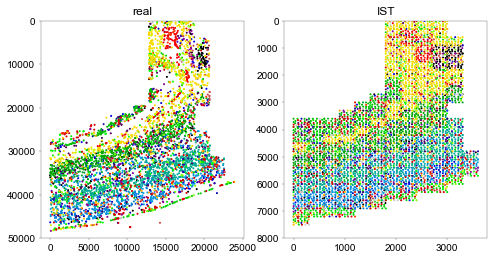

In [7]:
import matplotlib
from matplotlib import cm, colors
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'axes.linewidth': 0.25,
                            'xtick.major.size': 2,
                            'xtick.major.width': 0.25,
                            'ytick.major.size': 2,
                            'ytick.major.width': 0.25,
                            'pdf.fonttype': 42,
                            'font.sans-serif': 'Arial'})

plt.clf()
df = df.sort_values('cell_type_color')
df_ist = df_ist.sort_values('cell_type_color')
fix, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4))
ax1.scatter(df['X'], df['Y'], color=df['cell_type_color'], marker='o', s=1)
ax1.set_title(r'real')
ax1.set_ylim(50000,0)
ax2.scatter(df_ist['X'], df_ist['Y'], color=df_ist['cell_type_color'], marker='o', s=1)
ax2.set_title(r'IST')
ax2.set_ylim(8000,0)
#plt.gca().invert_yaxis()
#plt.savefig('../fig/full_osmFISH_data_real_IST_sidebyside.pdf')
#plt.tight_layout()
#plt.savefig('../fig/Figure2C.pdf')
plt.show()

<Figure size 432x288 with 0 Axes>

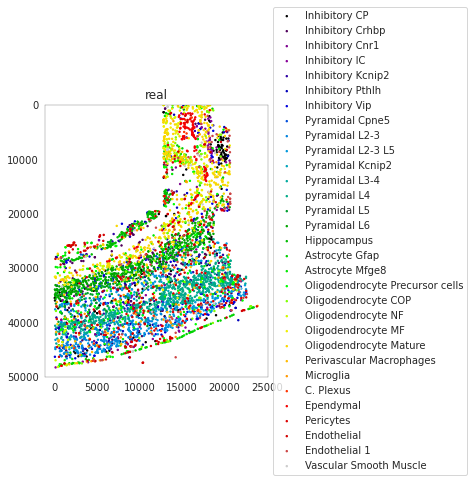

In [7]:
import matplotlib
from matplotlib import cm, colors
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'axes.linewidth': 0.25,
                            'xtick.major.size': 2,
                            'xtick.major.width': 0.25,
                            'ytick.major.size': 2,
                            'ytick.major.width': 0.25,
                            'pdf.fonttype': 42,
                            'font.sans-serif': 'Arial'})
plt.clf()
sns.set_style('white')
fig, (ax1) = plt.subplots(1,1, figsize = (5,5))
for toi in np.sort(df['Cluster_remap'].unique()):
    if toi == None:
        df_toi = df
        df_ist_toi = df_ist
    else:
        df_toi = df[df['Cluster_remap'] == toi]
        df_ist_toi = df_ist[df_ist['Cluster_remap'] == toi]
        label = df_toi['ClusterName'].unique()[0]
   
    ax1.scatter(df_toi['X'], df_toi['Y'], color=df_toi['cell_type_color'], marker='o', s=2, label=label)
    ax1.set_title(r'real')
    ax1.set_ylim(50000,0)

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig('../fig/osmfish_legends.pdf')

### Visualizing just types of interest

<Figure size 432x288 with 0 Axes>

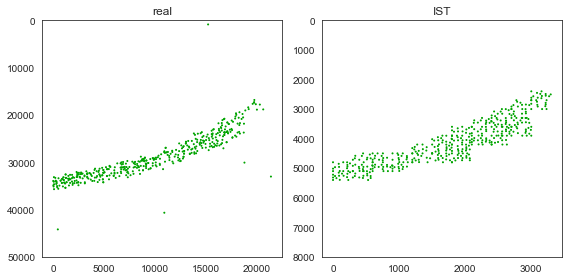

In [5]:
toi = 14

def plot_toi(df, df_ist, toi, outdir=None, filename=None):
    
    df_toi = df[df['Cluster_remap'] == toi]
    df_ist_toi = df_ist[df_ist['Cluster_remap'] == toi]
    
    plt.clf()
    sns.set_style('white')
    fix, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4))
    ax1.scatter(df_toi['X'], df_toi['Y'], color=df_toi['cell_type_color'], marker='o', s=1)
    ax1.set_title('real')
    ax1.set_ylim(50000,0)
    
    
    ax2.scatter(df_ist_toi['X'], df_ist_toi['Y'], color=df_ist_toi['cell_type_color'], marker='o', s=1)
    ax2.set_title('IST')
    ax2.set_ylim(8000,0)
    #ax2.set_xlim(0,4000)
    #plt.gca().invert_yaxis()
    #plt.savefig('../fig/full_osmFISH_data_real_IST_sidebyside.pdf')
    plt.tight_layout()
    
    
    if outdir != None:
        plt.savefig(outdir + filename)
    plt.show()
plot_toi(df, df_ist, toi, outdir=None, filename='real_ist_sidebyside_type' + str(toi) + '.pdf')

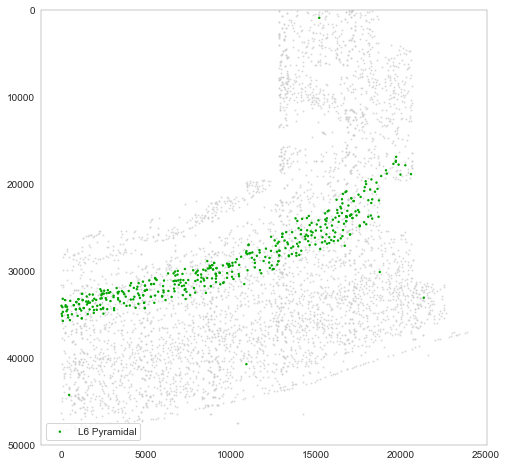

In [6]:
import matplotlib
from matplotlib import cm, colors
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'axes.linewidth': 0.25,
                            'xtick.major.size': 2,
                            'xtick.major.width': 0.25,
                            'ytick.major.size': 2,
                            'ytick.major.width': 0.25,
                            'pdf.fonttype': 42,
                            'font.sans-serif': 'Arial'})


df_toi = df[df['Cluster_remap'] == 14]
df_other = df[df['Cluster_remap'] != 14]
fix, (ax1) = plt.subplots(1,1, figsize = (8,8))

ax1.scatter(df_other['X'], df_other['Y'], color='#cdcdd1', marker='o',alpha = 0.6, s=1)
ax1.scatter(df_toi['X'], df_toi['Y'], color=df_toi['cell_type_color'], marker='o', s=2, label = r'L6 Pyramidal' )
#ax1.set_title('real')
ax1.set_ylim(50000,0)
ax1.legend(loc='lower left')
#plt.savefig('../fig/FigureS5D.pdf')
plt.show()

## Sampling experiments

### Helper functions

In [7]:
def build_assignment_matrix(attribute_dict, n_cell_types):
    data = list(attribute_dict.items())
    data = np.array(data)  # Assignment matrix

    B = np.zeros((data.shape[0], n_cell_types))  # Empty matrix

    for i in range(0, data.shape[0]):
        t = int(data[i, 1])
        B[i, t] = 1

    return B

def calculate_FOV_size(sampling_frac, min_x, max_x, min_y, max_y):
    area = (max_x - min_x) * (max_y - min_y)
    sampling_area = sampling_frac * area
    FOV_dim = np.round(np.sqrt(sampling_area))
    return FOV_dim

def random_FOV(FOV_dim, df, min_x, max_x, min_y, max_y):
    x_start = np.random.randint(min_x, max_x - FOV_dim)
    y_start = np.random.randint(min_y, max_y - FOV_dim)
    
    x_filtered = df[(df['X'] > x_start) & (df['X'] < x_start + FOV_dim)]
    random_FOV = x_filtered[(x_filtered['Y'] > y_start) & (x_filtered['Y'] < y_start + FOV_dim)]
    
    return random_FOV

def calculate_p_in_fov(fov, n_cell_types):
    types_in_fov = fov['Cluster_remap'].tolist()
    #print(types_in_fov)
    attribute_dict = dict(zip(fov.index, types_in_fov))
    B = build_assignment_matrix(attribute_dict, n_cell_types)
    return np.divide(np.sum(B, axis=0), B.shape[0])

def estimate_beta_from_FOV(df, fov_dim, type_of_interest, n_fov, x_min, x_max, y_min, y_max, n_cell_types):
    p_list = []
    i = 0
    ns = []
    while i < n_fov:
        fov = random_FOV(fov_dim, df, x_min, x_max, y_min, y_max)
        if len(fov) > 10:
            # because we don't define the boundary of the TISSUE just the boundary of the image
            # you could draw an fov out of tissue bounds but in the enclosing rectangle
            p_list.append(calculate_p_in_fov(fov, n_cell_types))
            ns.append(len(fov))
            i += 1
        else:
            continue
    print(ns)
    sample_proportions = np.vstack(p_list)
    props_of_interest = sample_proportions[:, type_of_interest]
    
    sample_mean = np.mean(props_of_interest)
    sample_var = np.var(props_of_interest)
    
    #print()
    alpha_hat = sample_mean * (((sample_mean*(1-sample_mean))/sample_var) - 1)
    beta_hat = (1 - sample_mean) * (((sample_mean*(1-sample_mean))/sample_var) - 1)
    
    #print(sample_mean, sample_var)
    #print(alpha_hat, beta_hat)
    return alpha_hat, beta_hat, props_of_interest, ns

def estimate_beta_from_FOV(df, fov_dim, type_of_interest, n_fov, x_min, x_max, y_min, y_max, n_cell_types):
    p_list = []
    i = 0
    ns = []
    while i < n_fov:
        fov = random_FOV(fov_dim, df, x_min, x_max, y_min, y_max)
        if len(fov) > 10:
            # because we don't define the boundary of the TISSUE just the boundary of the image
            # you could draw an fov out of tissue bounds but in the enclosing rectangle
            p_list.append(calculate_p_in_fov(fov, n_cell_types))
            ns.append(len(fov))
            i += 1
        else:
            continue
    print(ns)
    sample_proportions = np.vstack(p_list)
    props_of_interest = sample_proportions[:, type_of_interest]
    
    sample_mean = np.mean(props_of_interest)
    sample_var = np.var(props_of_interest)
    
    #print()
    alpha_hat = sample_mean * (((sample_mean*(1-sample_mean))/sample_var) - 1)
    beta_hat = (1 - sample_mean) * (((sample_mean*(1-sample_mean))/sample_var) - 1)

    return alpha_hat, beta_hat, props_of_interest, ns

def estimate_beta_from_FOV_ds(df, fov_dim, type_of_interest, n_fov, x_min, x_max, y_min, y_max, 
                           n_cell_types, target_size):
    p_list = []
    i = 0
    ns = []
    while i < n_fov:
        fov = random_FOV(fov_dim, df, x_min, x_max, y_min, y_max)
        if len(fov) == target_size:
            # because we don't define the boundary of the TISSUE just the boundary of the image
            # you could draw an fov out of tissue bounds but in the enclosing rectangle
            p_list.append(calculate_p_in_fov(fov, n_cell_types))
            ns.append(len(fov))
            i += 1
        elif len(fov) > target_size:
            #n_to_remove = len(fov) - target_size
            fov = fov.sample(n=target_size, replace=False)
            p_list.append(calculate_p_in_fov(fov, n_cell_types))
            ns.append(len(fov))
            i += 1
        else:
            continue
    #print(ns)
    sample_proportions = np.vstack(p_list)
    props_of_interest = sample_proportions[:, type_of_interest]
    
    sample_mean = np.mean(props_of_interest)
    sample_var = np.var(props_of_interest)
    
    #print()
    alpha_hat = sample_mean * (((sample_mean*(1-sample_mean))/sample_var) - 1)
    beta_hat = (1 - sample_mean) * (((sample_mean*(1-sample_mean))/sample_var) - 1)

    return alpha_hat, beta_hat, props_of_interest

def p_fov_with_rarest(a, b, m, N):
    return 1 - np.power((BF(a, b + m)/BF(a, b)), N)

def fov_cell_counts(df, fov_dim, toi, n_fov, x_min, x_max, y_min, y_max, n_cell_types, ret_n = False):
    
    p_list = []
    i = 0
    ns = []
    while i < n_fov:
        fov = random_FOV(fov_dim, df, x_min, x_max, y_min, y_max)
        if len(fov) > 10:
            types_in_fov = fov['Cluster_remap'].astype(int).tolist()
            #print(types_in_fov)
            attribute_dict = dict(zip(fov.index, types_in_fov))
            B = build_assignment_matrix(attribute_dict, n_cell_types)
            p_list.append(np.sum(B, axis=0))
            ns.append(len(fov))
            i += 1
        else:
            continue
        
    sample_counts = np.vstack(p_list)
    
    if ret_n == True:
        return sample_counts[:, toi].astype(int), np.sum(sample_counts, axis=1).astype(int)
    else:
        return sample_counts[:, toi].astype(int)
    

In [8]:
toi = 14 #type of interest
n_fov = 50 #number of FOVs from which parameters are estimated.

x_min = min(df['X'])
x_max = max(df['X'])
y_min = min(df['Y'])
y_max = max(df['Y'])

fov_size_05r = calculate_FOV_size(0.005, x_min, x_max, y_min, y_max)
fov_size_1r = calculate_FOV_size(0.01, x_min, x_max, y_min, y_max)
fov_size_5r = calculate_FOV_size(0.05, x_min, x_max, y_min, y_max)
fov_size_75r = calculate_FOV_size(0.075, x_min, x_max, y_min, y_max)
fov_size_10r = calculate_FOV_size(0.10, x_min, x_max, y_min, y_max)

x_min = min(df_ist['X'])
x_max = max(df_ist['X'])
y_min = min(df_ist['Y'])
y_max = max(df_ist['Y'])

fov_size_05i = calculate_FOV_size(0.005, x_min, x_max, y_min, y_max)
fov_size_1i = calculate_FOV_size(0.01, x_min, x_max, y_min, y_max)
fov_size_5i = calculate_FOV_size(0.05, x_min, x_max, y_min, y_max)
fov_size_75i = calculate_FOV_size(0.075, x_min, x_max, y_min, y_max)
fov_size_10i = calculate_FOV_size(0.10, x_min, x_max, y_min, y_max)

In [11]:
#toi = 17 #type of interest
n_fov = 1000 #number of FOVs from which parameters are estimated.

x_min = min(df['X'])
x_max = max(df['X'])
y_min = min(df['Y'])
y_max = max(df['Y'])

n_toi_observed,ns = fov_cell_counts(df, fov_size_5r, toi, n_fov, x_min, x_max, y_min, y_max, n_cell_types, ret_n=True)

In [12]:
np.mean(ns)

340.834

In [17]:
values, counts = np.unique(n_toi_observed, return_counts=True)

Text(0, 0.5, 'Count')

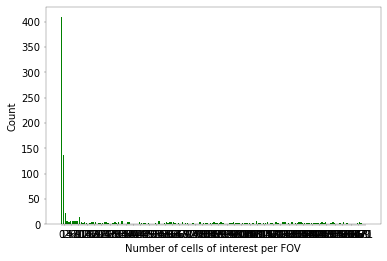

In [27]:
v = np.arange(0, max(values) + 1)
val_count = dict(zip(values, counts))
c = [val_count[i] if i in values else 0 for i in v]
plt.bar(v, c, color='g')
_ = plt.xticks(ticks=v)
plt.xlabel('Number of cells of interest per FOV')
plt.ylabel('Count')

### Estimate Beta Binomial single cell sampling parameters

In [18]:
from scipy.stats import beta
import matplotlib.pyplot as plt
from scipy.stats import betabinom

In [19]:
toi = 14
n_fov = 300

x_min = min(df['X'])
x_max = max(df['X'])
y_min = min(df['Y'])
y_max = max(df['Y'])
n_toi_observed, ns = fov_cell_counts(df, fov_size_5r, toi, n_fov, x_min, x_max, y_min, y_max, n_cell_types, ret_n=True)
props_of_interest = np.divide(n_toi_observed, ns)
sample_mean = np.mean(props_of_interest)
sample_var = np.var(props_of_interest)
alpha_hat_r = sample_mean * (((sample_mean*(1-sample_mean))/sample_var) - 1)
beta_hat_r = (1 - sample_mean) * (((sample_mean*(1-sample_mean))/sample_var) - 1)

x_min = min(df_ist['X'])
x_max = max(df_ist['X'])
y_min = min(df_ist['Y'])
y_max = max(df_ist['Y'])
n_toi_observed, ns = fov_cell_counts(df_ist, fov_size_5i, toi, n_fov, x_min, x_max, y_min, y_max, n_cell_types, ret_n=True)
props_of_interest = np.divide(n_toi_observed, ns)
sample_mean = np.mean(props_of_interest)
sample_var = np.var(props_of_interest)
alpha_hat_i = sample_mean * (((sample_mean*(1-sample_mean))/sample_var) - 1)
beta_hat_i = (1 - sample_mean) * (((sample_mean*(1-sample_mean))/sample_var) - 1)


In [23]:
len(df)

4839

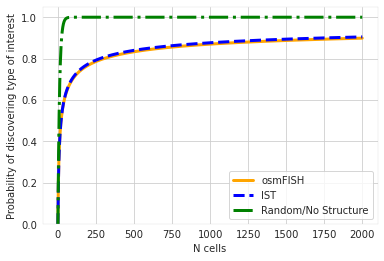

In [29]:
import matplotlib
from scipy.stats import binom
from matplotlib import cm, colors
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'axes.linewidth': 0.25,
                            'xtick.major.size': 2,
                            'xtick.major.width': 0.25,
                            'ytick.major.size': 2,
                            'ytick.major.width': 0.25,
                            'pdf.fonttype': 42,
                            'font.sans-serif': 'Arial'})

sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 1)
x = np.arange(0, 2000)
ax.plot(x, betabinom.sf(0, x, alpha_hat_r, beta_hat_r), color = 'orange', lw = 3, label=r'osmFISH')
ax.plot(x, betabinom.sf(0, x, alpha_hat_i, beta_hat_i), color = 'blue', linestyle='dashed', lw = 3, label=r'IST')
ax.plot(x, binom.sf(0, x, p=len(df_toi)/len(df)), color='green', lw=3, linestyle= '-.', label=r'Random/No Structure')
ax.set_xlabel(r'N cells')
ax.set_ylabel(r'Probability of discovering type of interest')
ax.set_ylim(0,1.05)
plt.legend()
plt.savefig('../fig/L6_discovery_singlecell_sampling_with_random.pdf')
#plt.savefig('../fig/FigureS5C.pdf')
plt.show()

<Figure size 640x480 with 0 Axes>

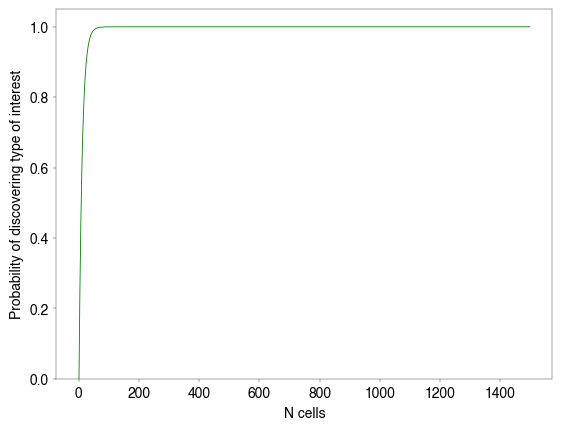

In [19]:
import matplotlib
from scipy.stats import binom
from matplotlib import cm, colors
import matplotlib.pyplot as plt

plt.clf()
matplotlib.rc_file_defaults()
matplotlib.rcParams.update({'axes.linewidth': 0.25,
                            'xtick.major.size': 2,
                            'xtick.major.width': 0.25,
                            'ytick.major.size': 2,
                            'ytick.major.width': 0.25,
                            'pdf.fonttype': 42,
                            'font.sans-serif': 'Helvetica'})

#sns.set_style("white")
fig, ax = plt.subplots(1, 1)
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
x = np.arange(0, 1500)
#ax.plot(x, betabinom.sf(0, x, alpha_hat_r, beta_hat_r), color = 'orange', lw = 3, label=r'osmFISH')
#ax.plot(x, betabinom.sf(0, x, alpha_hat_i, beta_hat_i), color = 'blue', linestyle='dashed', lw = 3, label=r'IST')
ax.plot(x, binom.sf(0, x, p=len(df_toi)/len(df)), color='green', lw=0.6,  label=r'Random/No Structure')
ax.set_xlabel(r'N cells')
ax.set_ylabel(r'Probability of discovering type of interest')
ax.set_ylim(0,1.05)
#plt.legend()
#plt.savefig('../fig/L6_discovery_singlecell_sampling_with_random.pdf')
plt.savefig('/Users/ethan/Desktop/L6_binomial.pdf')
plt.show()

### Estimate NB parameters

In [34]:
from scipy.stats import nbinom

#### Method of moments (better if not zero inflated)

In [35]:
xbar = np.mean(n_toi_observed)
x2bar = np.mean(n_toi_observed**2)

k = xbar**2/(x2bar - xbar**2 - xbar)
m = xbar

print(m, k)

28.606666666666666 0.4688116697707019


In [36]:
def convert_params(m, k):
    """ 
    Convert mean/dispersion parameterization of a negative binomial to the ones scipy supports

    Parameters
    ----------
    m : float 
       Mean
    k : float
       Overdispersion parameter. 
    """
    k = 1/k
    var = m + k * m ** 2
    p = (var - m) / var
    r = m ** 2 / (var - m)
    return r, 1-p

In [37]:
r, p = convert_params(m, k)

Text(0, 0.5, 'Count')

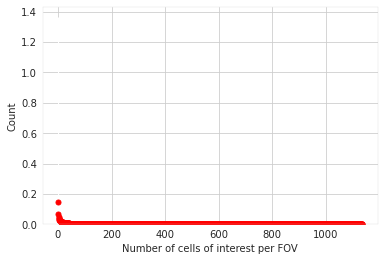

In [38]:
v = np.arange(0, max(values) + 1)
val_count = dict(zip(values, counts))
c = np.array([val_count[i] if i in values else 0 for i in v])
plt.bar(v, c/n_fov, color='k')
x = np.arange(nbinom.ppf(1e-5, r, p),
              nbinom.ppf(1-1e-9, r, p))
plt.plot(x, nbinom.pmf(x, r, p), 'ro', ms=5, label='nbinom pmf')

#_ = plt.xticks(ticks=v)
plt.xlabel('Number of cells of interest per FOV')
plt.ylabel('Count')

#### ZTM Fit (better for zero-inflated)

In [39]:
from scipy.optimize import fsolve

In [40]:
v = np.arange(0, max(values) + 1)
val_count = dict(zip(values, counts))
c = np.array([val_count[i] if i in values else 0 for i in v])

In [41]:
n0 = c[0]
N = np.sum(c)
p0 = n0/N
m = np.mean(n_toi_observed)
def f2(k, p0, m):
    return np.power((m/k + 1), -k) - p0


In [43]:
r, p = convert_params(m, k)
print(r, p)

0.4688116697707019 0.016123953812418823


In [ ]:
mean, var, skew, kurt = nbinom.stats(r, p, moments='mvsk')
k = fsolve(f2, x0=0.2, args=(p0, m))
r, p = convert_params(m, k[0])
print(r,p)

In [49]:
c_normed = c/n_fov
ecdf = np.cumsum(c_normed)
model_pmf = nbinom.pmf(x, r, p)
model_cdf = np.cumsum(model_pmf[:len(ecdf)])

### Construct FOV plot

In [51]:
p0 = model_pmf[0]

In [52]:
def p_discovery_in_n_fov(p0, n):
        return 1 - np.power(p0, n)

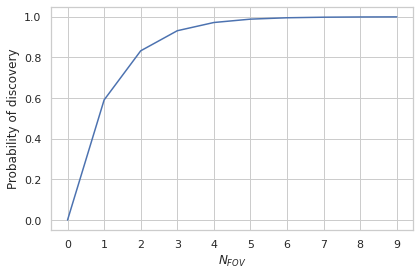

In [53]:
ns = np.arange(0,10)
sns.lineplot(x=ns, y=p_discovery_in_n_fov(p0, ns))
plt.xticks(ticks=ns)
plt.ylabel('Probability of discovery')
plt.xlabel('$N_{FOV}$')
plt.tight_layout()
plt.show()

### Construct plots with CIs

In [54]:
def do_model_trials(df, fov_size, toi, n_cell_types, n_fov, n_trials):
    
    x_min = min(df['X'])
    x_max = max(df['X'])
    y_min = min(df['Y'])
    y_max = max(df['Y'])

    trial_counter = 0
    
    def f2(k, p0, m):
            return np.power((m/k + 1), -k) - p0
    ns = np.arange(0,10)
    while trial_counter < n_trials:
        n_toi_observed = fov_cell_counts(df, fov_size, toi, n_fov, x_min, x_max, y_min, y_max, n_cell_types)
        values, counts = np.unique(n_toi_observed, return_counts=True)
        v = np.arange(0, max(values) + 1)
        val_count = dict(zip(values, counts))
        c = np.array([val_count[i] if i in values else 0 for i in v])
        
        #Parameter estimation with ZTM method
        n0 = c[0]
        N = np.sum(c)
        p0 = n0/N
        m = np.mean(n_toi_observed)
        k = fsolve(f2, x0=0.2, args=(p0, m))
        r, p = convert_params(m, k[0])
        
        x = np.arange(0, 60)
        if trial_counter == 0:
            res = nbinom.pmf(x, r, p)
            fov = p_discovery_in_n_fov(p0, ns)
        else:
            res = np.vstack((res, nbinom.pmf(x, r, p)))
            fov = np.vstack((fov, p_discovery_in_n_fov(p0, ns)))
        trial_counter += 1 
    
    
    return res, fov

In [60]:
toi = 14
n_fov = 20
res_1r, fov_1r = do_model_trials(df, fov_size=fov_size_1r, toi=toi, n_cell_types=n_cell_types, n_fov=n_fov, n_trials = 100)
res_5r, fov_5r = do_model_trials(df, fov_size=fov_size_5r, toi=toi, n_cell_types=n_cell_types, n_fov=n_fov, n_trials = 100)
res_10r, fov_10r = do_model_trials(df, fov_size=fov_size_10r, toi=toi, n_cell_types=n_cell_types, n_fov=n_fov, n_trials = 100)
res_05r, fov_05r = do_model_trials(df, fov_size=fov_size_05r, toi=toi, n_cell_types=n_cell_types, n_fov=n_fov, n_trials = 100)

res_1i, fov_1i = do_model_trials(df_ist, fov_size=fov_size_1i, toi=toi, n_cell_types=n_cell_types, n_fov=n_fov, n_trials = 100)
res_5i, fov_5i = do_model_trials(df_ist, fov_size=fov_size_5i, toi=toi, n_cell_types=n_cell_types, n_fov=n_fov, n_trials = 100)
res_10i, fov_10i = do_model_trials(df_ist, fov_size=fov_size_10i, toi=toi, n_cell_types=n_cell_types, n_fov=n_fov, n_trials = 100)
res_05i, fov_05i = do_model_trials(df_ist, fov_size=fov_size_05i, toi=toi, n_cell_types=n_cell_types, n_fov=n_fov, n_trials = 100)

<ipython-input-54-235a83213ba9>:11: RuntimeWarning: invalid value encountered in power
  return np.power((m/k + 1), -k) - p0


In [61]:
def calc_errs(arr, ci=0.95):
    means = np.mean(arr, axis = 0)
    std = np.std(arr, axis = 0)
    ci = stats.norm.ppf(0.95) * (std/np.sqrt(arr.shape[0]))
    return means, ci

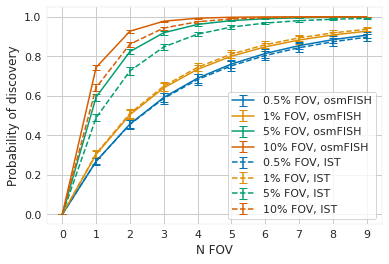

In [63]:
import matplotlib
from matplotlib import cm, colors
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'axes.linewidth': 0.25,
                            'xtick.major.size': 2,
                            'xtick.major.width': 0.25,
                            'ytick.major.size': 2,
                            'ytick.major.width': 0.25,
                            'pdf.fonttype': 42,
                            'font.sans-serif': 'Arial'})

labels = ['0.5% FOV, osmFISH', '1% FOV, osmFISH', '5% FOV, osmFISH', '10% FOV, osmFISH',
          '0.5% FOV, IST', '1% FOV, IST', '5% FOV, IST', '10% FOV, IST']
arrs = [fov_05r, fov_1r, fov_5r, fov_10r, fov_05i, fov_1i, fov_5i, fov_10i]
sns.set_style('whitegrid')
for i in range(0, len(arrs)):
    mean, ci = calc_errs(arrs[i], ci=0.95)
    if i < 4:
        plt.errorbar(ns, mean, yerr=ci, label=str(labels[i]), color = sns.color_palette('colorblind')[i%4], capsize=4)
    else:
        plt.errorbar(ns, mean, yerr=ci, label=str(labels[i]), linestyle='dashed', capsize=4, color = sns.color_palette('colorblind')[i%4])
        
    _ = plt.xticks(ticks=ns)
    plt.xlabel(r'N FOV')
    plt.ylabel(r'Probability of discovery')
    plt.legend()
    #plt.tight_layout()
    #plt.savefig('../fig/nFOVs_cell'+str(toi)+'discovery_ci95.pdf')
    plt.savefig('../fig/Figure2D.pdf')